In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
%matplotlib inline

In [2]:
matches = pd.read_csv('IPL Matches 2008-2020.csv', encoding = 'latin1' )

In [3]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv', encoding = 'latin1' )

In [4]:
df = pd.read_json(r'C:\Users\PARVA\Downloads\player_info.json')

In [5]:
bowlers = pd.read_csv('bowlers.csv',header = 'infer')

In [6]:
matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18/04/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19/04/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19/04/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20/04/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20/04/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
matches.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [8]:
matches['date'] = pd.to_datetime(matches['date'],errors='coerce')

In [9]:
matches.dtypes

id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

In [10]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [11]:
matches.replace('Brngaluru','Bangalore', inplace = True)
matches.replace({'Deccan Chargers':'Sunrisers Hyderabad','Delhi Daredevils':'Delhi Capitals',
                 'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace = True)
matches.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                     'M.Chinnaswamy Stadium':'M. Chinnaswamy Stadium',              
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},inplace=True)
matches['eliminator'].fillna('mode',inplace = True)
matches['winner'].fillna('No-Result',inplace = True)
matches['result_margin'].fillna('No-Result',inplace = True)
matches['result'].fillna('No-Result',inplace = True)
matches['player_of_match'].fillna('No-Result',inplace = True)
matches['city'].fillna('Unknown',inplace = True)

In [12]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [13]:
matches.replace({'Deccan Chargers':'Sunrisers Hyderabad','Delhi Daredevils':'Delhi Capitals',
                 'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace = True)
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [14]:
matches.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                     'M.Chinnaswamy Stadium':'M. Chinnaswamy Stadium',              
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},inplace=True)

In [15]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [16]:
matches.drop('method', inplace = True, axis = 1)

In [17]:
matches['eliminator'].fillna('mode',inplace = True)
matches['winner'].fillna('No-Result',inplace = True)
matches['result_margin'].fillna('No-Result',inplace = True)
matches['result'].fillna('No-Result',inplace = True)
matches['player_of_match'].fillna('No-Result',inplace = True)
matches['city'].fillna('Unknown',inplace = True)

In [18]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [19]:
matches['season'] = matches['date'].dt.year
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M. Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,Punjab Cricket Association Stadium,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,No-Result,Y,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-05-11,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-06-11,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-08-11,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi,2020


In [20]:
deliveries.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [21]:
deliveries.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [22]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
dtype: int64

In [23]:
deliveries['dismissal_kind'].fillna('Not-Out',inplace = True)
deliveries['player_dismissed'].fillna('None',inplace = True)
deliveries['extras_type'].fillna('No-Extras',inplace = True)
deliveries['fielder'].fillna('None',inplace = True)

In [24]:
deliveries.isnull().sum()

id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64

In [25]:
deliveries

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,Not-Out,None,None,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians


In [26]:
bowlers.dtypes

bowler          object
bowling Hand    object
bowling Type    object
dtype: object

In [27]:
bowlers.isnull().sum()

bowler           0
bowling Hand     0
bowling Type    61
dtype: int64

In [28]:
bowlers['bowling Type'].unique()

array(['Right Arm Medium', 'Left Arm Fast Medium', 'Right Arm Off Break',
       'Right Arm Medium Fast', 'Left Arm Orthodox',
       'Right Arm Fast Medium', nan, 'Right Arm Leg Break',
       'Left Arm Medium', 'Right Arm Fast', 'Left Arm Chinaman (Googly)',
       'Left Arm Medium Fast', 'Left Arm Orthodox/Left Arm Medium Fast',
       'Left Arm Fast', 'Right Arm Off Break/Right Arm Leg Break'],
      dtype=object)

In [29]:
data = matches[['id','season','date']].merge(deliveries, left_on = 'id', right_on = 'id',how = 'left')
data

,id,season,date,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,2008-04-18,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,2008-04-18,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,2008-04-18,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,2008,2008-04-18,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,2008,2008-04-18,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2020,2020-10-11,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians
193464,1237181,2020,2020-10-11,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians
193465,1237181,2020,2020-10-11,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,Not-Out,None,None,wides,Delhi Capitals,Mumbai Indians
193466,1237181,2020,2020-10-11,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians


In [30]:
df = pd.merge(data,bowlers,on = 'bowler', how = 'left')
df.isnull().sum()

id                     0
season                 0
date                   0
inning                 0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
batsman_runs           0
extra_runs             0
total_runs             0
non_boundary           0
is_wicket              0
dismissal_kind         0
player_dismissed       0
fielder                0
extras_type            0
batting_team           0
bowling_team           0
bowling Hand        3335
bowling Type        6713
dtype: int64

In [31]:
IPL = pd.read_csv(r'C:\Users\PARVA\OneDrive\Desktop\IPL.csv')

In [32]:
IPL.isnull().sum()

id                  0
season              0
date                0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
bowling Hand        0
bowling Type        0
dtype: int64

In [33]:
IPL.dtypes

id                   int64
season               int64
date                object
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
bowling Hand        object
bowling Type        object
dtype: object

In [34]:
IPL.shape

(193468, 22)

In [35]:
IPL.replace({'Left Arm Orthodox':'Left Arm Spin',
            'Right Arm Leg Break':'Right Arm Spin',
            'Right Arm Medium':'Right Arm Medium Fast',
            'Right Arm Off Break':'Right Arm Spin',
            'Right Arm Fast':'Right Arm Fast Medium',
            'Left Arm Orthodox/Left Arm Medium Fast':'Left Arm Spin',
            'Right Arm Off Break/Right Arm Leg Break':'Right Arm Spin',
            'Left Arm Medium':'Left Arm Medium Fast',
            'Left Arm Chinaman (Googly)':'Left Arm Spin','Left Arm Fast':'Left Arm Fast Medium'},inplace = True)

In [36]:
IPL['bowling Type'].unique()

array(['Right Arm Fast Medium', 'Left Arm Fast Medium', 'Left Arm Spin',
       'Right Arm Medium Fast', 'Right Arm Spin', 'Left Arm Medium Fast'],
      dtype=object)

In [37]:
IPL.replace({'Right Arm Fast Medium':'Fast','Left Arm Fast Medium':'Fast',
            'Left Arm Spin':'Spin','Right Arm Spin':'Spin',
            'Right Arm Medium Fast':'Medium','Left Arm Medium Fast':'Medium'}, inplace = True)

In [38]:
IPL.dtypes

id                   int64
season               int64
date                object
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
bowling Hand        object
bowling Type        object
dtype: object

# EDA

In [39]:
labels = ["{0} - {1}".format(i, i + 1) for i in range(1,10,2)]
labels
IPL['ball1'] = pd.cut(IPL.ball,range (1,12,2),labels = labels, right = False)

In [40]:
IPL.ball.value_counts(normalize = True)

1    0.162156
2    0.161706
3    0.161267
4    0.160900
5    0.160399
6    0.159866
7    0.028537
8    0.004471
9    0.000698
Name: ball, dtype: float64

In [41]:
IPL.head()

,id,season,date,inning,over,ball,batsman,non_striker,bowler,batsman_runs,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,bowling Hand,bowling Type,ball1
0,335982,2008,18/04/2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6
1,335982,2008,18/04/2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6
2,335982,2008,18/04/2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2
3,335982,2008,18/04/2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2
4,335982,2008,18/04/2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,3 - 4


In [42]:
bins = [0,2,4,6,10]
labels=['Start','Middle','End','Extra']
IPL['ball_bins'] = pd.cut(IPL['ball'], bins=bins, labels=labels, include_lowest=True)
IPL.head()

,id,season,date,inning,over,ball,batsman,non_striker,bowler,batsman_runs,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,bowling Hand,bowling Type,ball1,ball_bins
0,335982,2008,18/04/2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6,End
1,335982,2008,18/04/2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6,End
2,335982,2008,18/04/2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2,Start
3,335982,2008,18/04/2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2,Start
4,335982,2008,18/04/2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,3 - 4,Middle


Binning is done on the balls column where ball 1 and 2 represents Start of the over, 3 and 4 is Middle of the over, 5 and 6 as the End of the over and any extra balls are considered as Extra.

This is done to identify at what stage of the game there are more wickets are falling and most number of boundaries are conceded.

In [43]:
IPL.batsman_runs.value_counts()

0    77637
1    71937
4    21908
2    12408
6     8902
3      616
5       60
Name: batsman_runs, dtype: int64

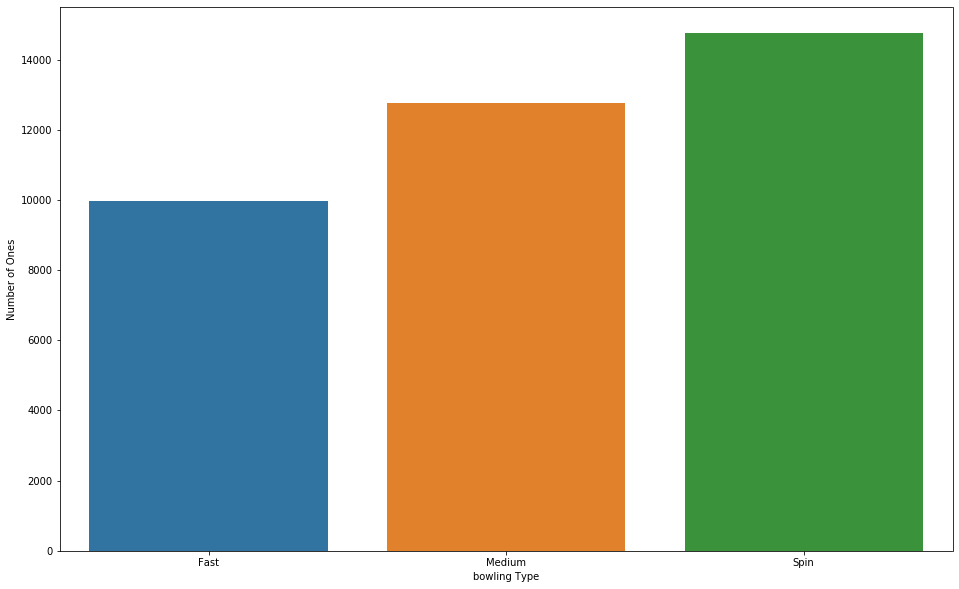

In [44]:
batsman_1_1 = IPL[(IPL.batsman_runs == 1) & (IPL.inning == 1) ]
batsman_1s = batsman_1_1.groupby(['bowling Type'])['total_runs'].count()
batsman_1s
batsman1_s = batsman_1s.to_frame().reset_index()
batsman1_s.rename(columns = {'total_runs':'Number of Ones'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman1_s['bowling Type'],y = batsman1_s['Number of Ones'])

In the first innings of the match the highest number of singles are taken against the spin bowlers

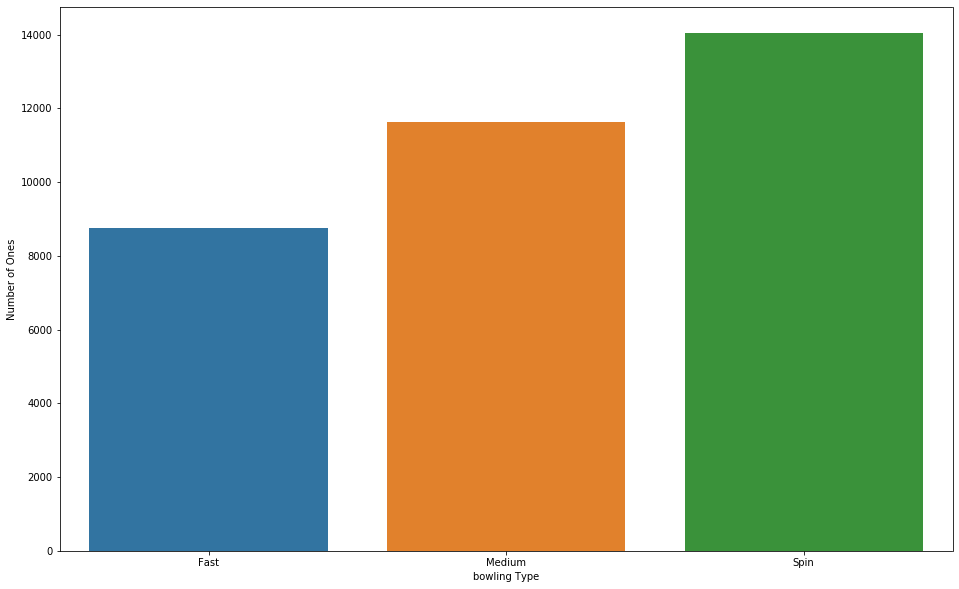

In [45]:
batsman_1_2 = IPL[(IPL.batsman_runs == 1) & (IPL.inning == 2) ]
batsman_1 = batsman_1_2.groupby(['bowling Type'])['total_runs'].count()
batsman_1
batsman1_ss = batsman_1.to_frame().reset_index()
batsman1_ss.rename(columns = {'total_runs':'Number of Ones'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman1_ss['bowling Type'],y = batsman1_ss['Number of Ones'])

In the second innings of the match the highest number of singles are taken against the spin bowlers.

Also there is an increased number of singles taken in the first innings against the fast bowling type compared to the second innings.

The number of singles taken against medium fast bowling type is close in both the innings.

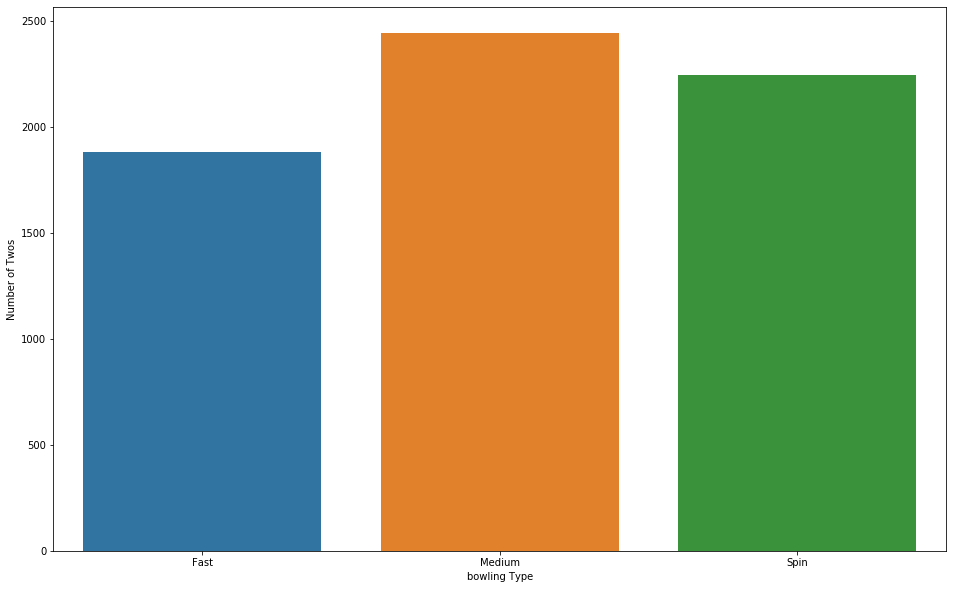

In [46]:
batsman_2_1 = IPL[(IPL.batsman_runs == 2) & (IPL.inning == 1) ]
batsman_2s = batsman_2_1.groupby(['bowling Type'])['total_runs'].count()
batsman_2s
batsman2_s = batsman_2s.to_frame().reset_index()
batsman2_s.rename(columns = {'total_runs':'Number of Twos'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman2_s['bowling Type'],y = batsman2_s['Number of Twos'])

In the first innings of the match the highest number of two's are taken against the medium pace bowlers

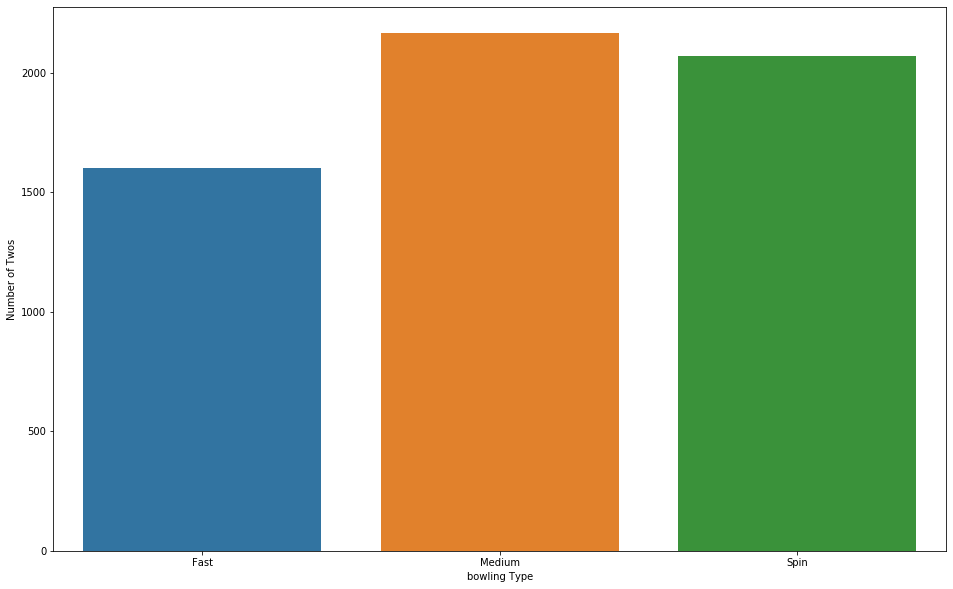

In [47]:
batsman_2_2 = IPL[(IPL.batsman_runs == 2) & (IPL.inning == 2) ]
batsman_2 = batsman_2_2.groupby(['bowling Type'])['total_runs'].count()
batsman_2
batsman2_ss = batsman_2.to_frame().reset_index()
batsman2_ss.rename(columns = {'total_runs':'Number of Twos'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman2_ss['bowling Type'],y = batsman2_ss['Number of Twos'])

There are highest number of two's taken in the first innings and second innings is close against the medium fast and spin bowlers but there is a fall in the number of two's taken against the fast bowlers in the second innings compared to the first innings.

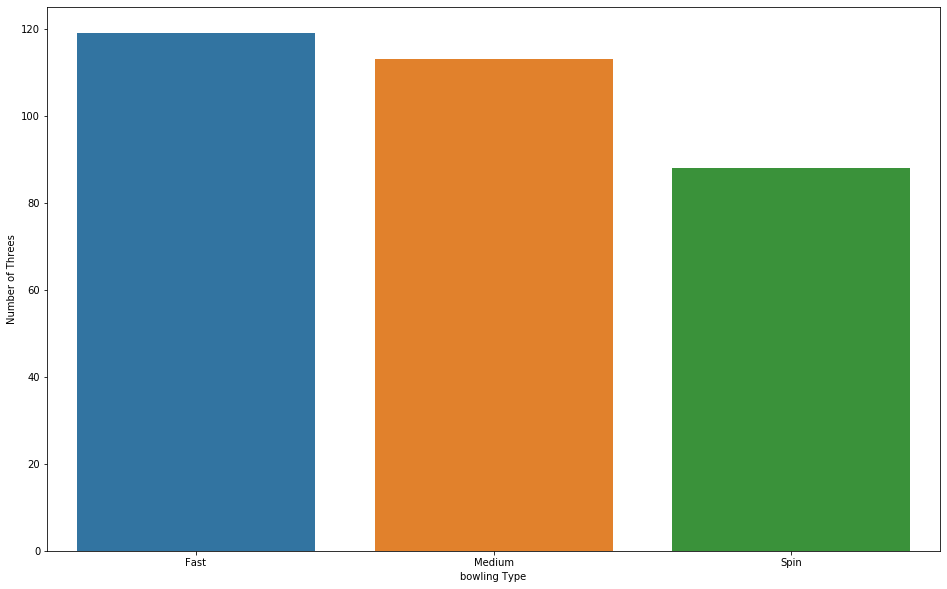

In [48]:
batsman_3_1 = IPL[(IPL.batsman_runs == 3) & (IPL.inning == 1) ]
batsman_3s = batsman_3_1.groupby(['bowling Type'])['total_runs'].count()
batsman_3s
batsman3_s = batsman_3s.to_frame().reset_index()
batsman3_s.rename(columns = {'total_runs':'Number of Threes'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman3_s['bowling Type'],y = batsman3_s['Number of Threes'])

The number of three's taken in the first innings is high against the fast bowlers and the spinnes concede least number of three's in the first innings.

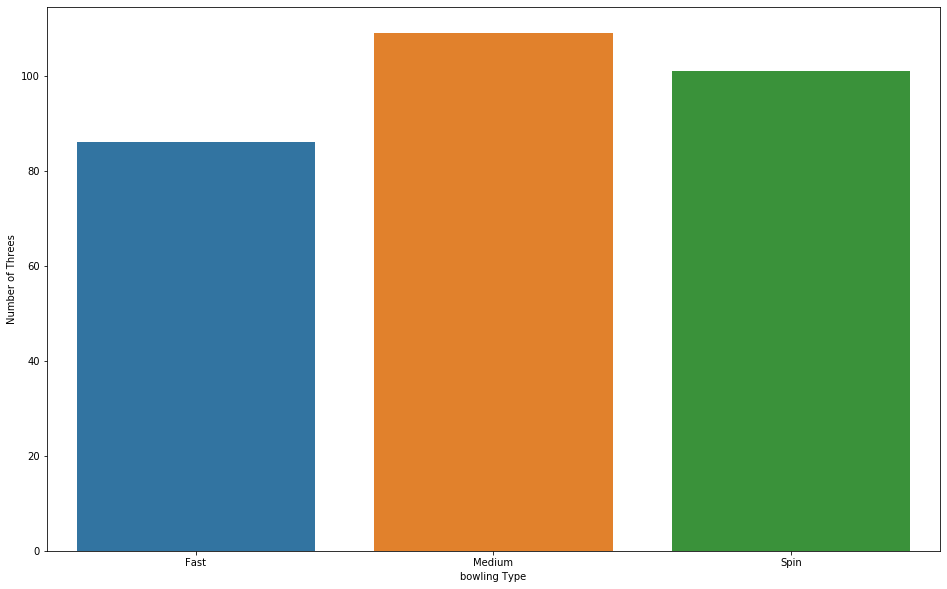

In [49]:
batsman_3_2 = IPL[(IPL.batsman_runs == 3) & (IPL.inning == 2) ]
batsman_3 = batsman_3_2.groupby(['bowling Type'])['total_runs'].count()
batsman_3
batsman3_ss = batsman_3.to_frame().reset_index()
batsman3_ss.rename(columns = {'total_runs':'Number of Threes'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman3_ss['bowling Type'],y = batsman3_ss['Number of Threes'])

In the second innings the fast bowlers are conceding less threes compared to the first innings.

The spin bowlers conceding three's in the second innings is slightly increased but the medium paces are closely related in both the innings.

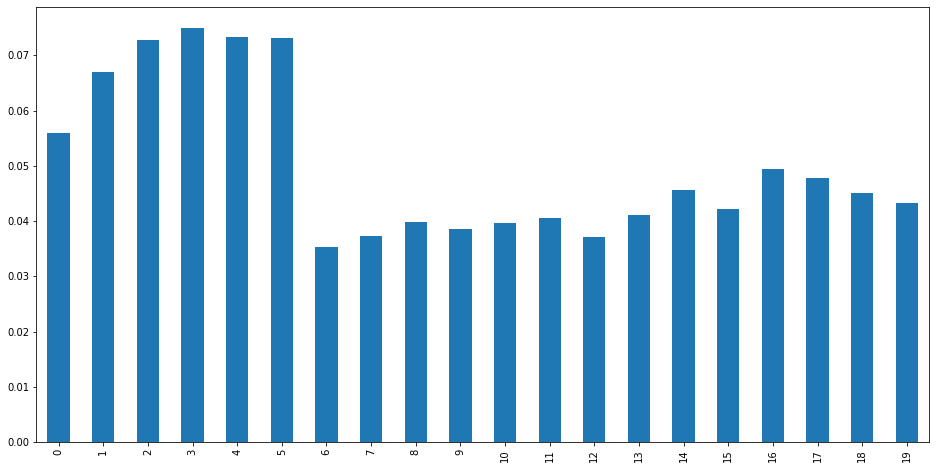

In [50]:
IPL[IPL.batsman_runs == 4].over.value_counts(normalize=True).sort_index().plot.bar(figsize=(16, 8))

The highest number of fours conceded by the bowlers is in the first five overs and powerplay might be the reason
for bowlers conceding more fours in the first five overs.

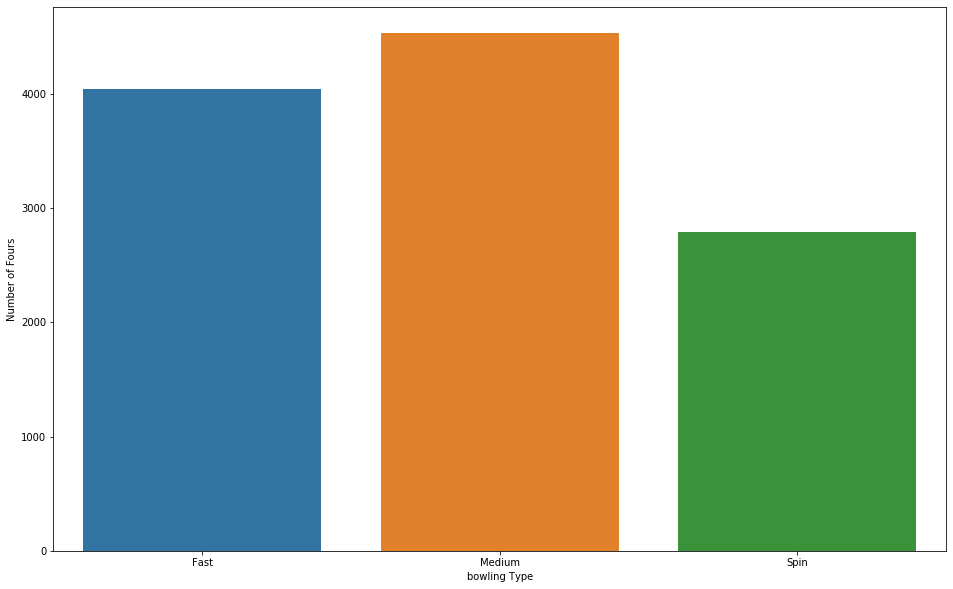

In [51]:
batsman_4_1 = IPL[(IPL.batsman_runs == 4) & (IPL.inning == 1) ]
batsman_4s = batsman_4_1.groupby(['bowling Type'])['total_runs'].count()
batsman_4s
batsman4_s = batsman_4s.to_frame().reset_index()
batsman4_s.rename(columns = {'total_runs':'Number of Fours'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman4_s['bowling Type'],y = batsman4_s['Number of Fours'])

In the innings 1 medium pacers are conceding more fours and spinners are conceding less fours in innings 1 compared with fast bowlers and medium pacers.

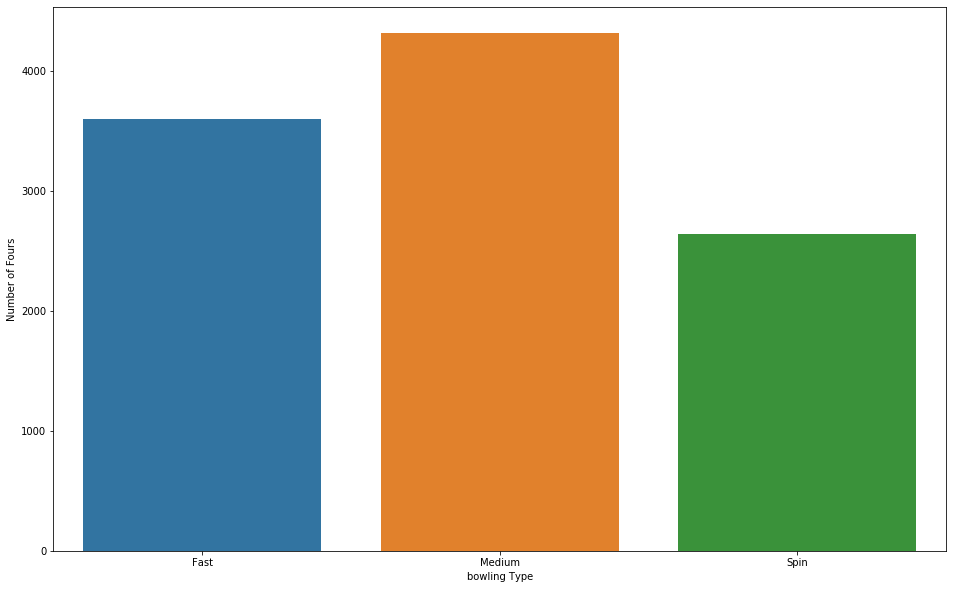

In [52]:
batsman_4_2 = IPL[(IPL.batsman_runs == 4) & (IPL.inning == 2) ]
batsman_4 = batsman_4_2.groupby(['bowling Type'])['total_runs'].count()
batsman_4
batsman4_ss = batsman_4.to_frame().reset_index()
batsman4_ss.rename(columns = {'total_runs':'Number of Fours'}, inplace = True)
plt.figure(figsize = (16,10))
sns.barplot(x = batsman4_ss['bowling Type'],y = batsman4_ss['Number of Fours'])

The number of fours conceded by the fast bowlers in the second innings is slightly reduced but the medium and spin bowlers are closely related to the first innings.

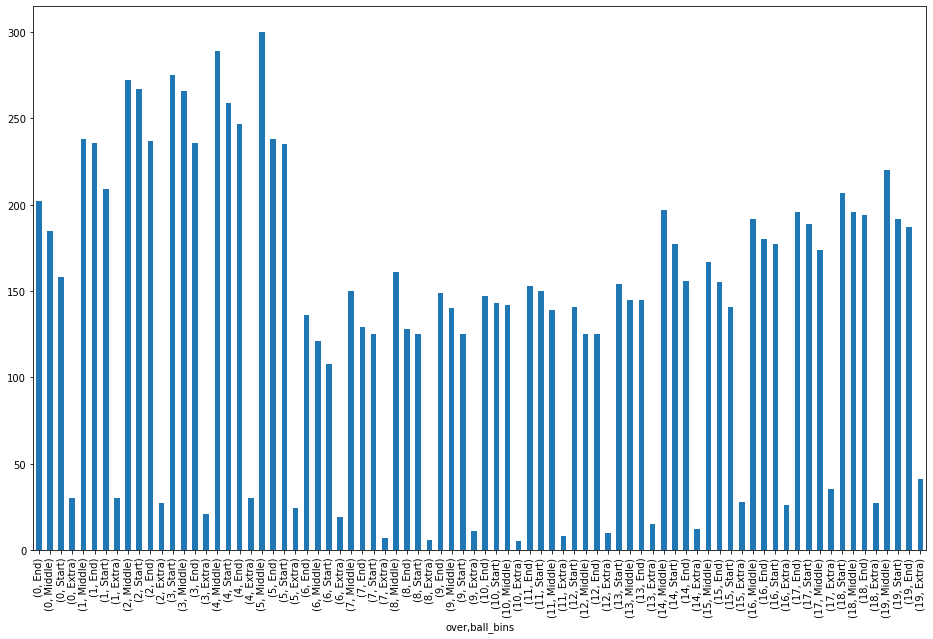

In [53]:
batsman_4 = IPL[(IPL.batsman_runs == 4) & (IPL.inning == 1) ]
batsman_4s = batsman_4.groupby(['over'])['ball_bins'].value_counts().plot.bar(figsize = (16,10))

The highest number of fours are scored in the Middle of the 5th over of the match and there is a significant number of boundaries scored towards the end of the first innings.

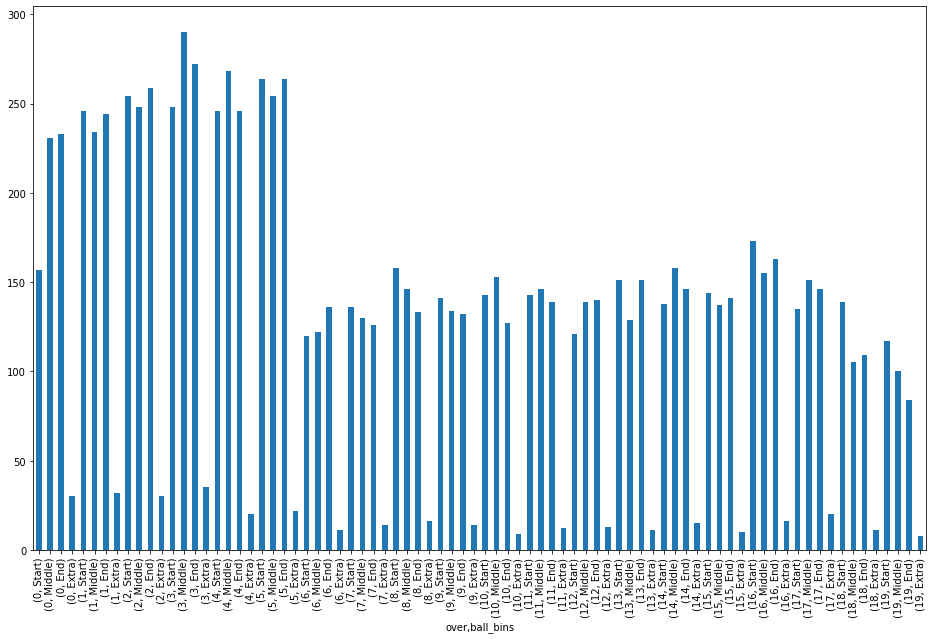

In [54]:
batsman_4s_2 = IPL[(IPL.batsman_runs == 4) & (IPL.inning == 2) ]
batsman_4s_2s = batsman_4s_2.groupby(['over'])['ball_bins'].value_counts().sort_index().plot.bar(figsize = (16,10))

There are less fours scored towards the end of the second innings compared with the first innings.

The most succesful boundaries are scored in the middle of the 3rd over in the second innings.

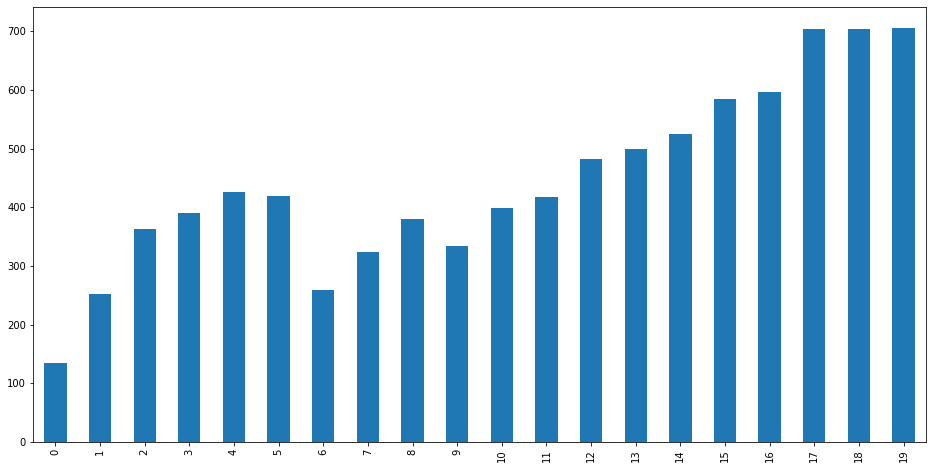

In [55]:
IPL[IPL.batsman_runs == 6].over.value_counts().sort_index().plot.bar(figsize=(16, 8))

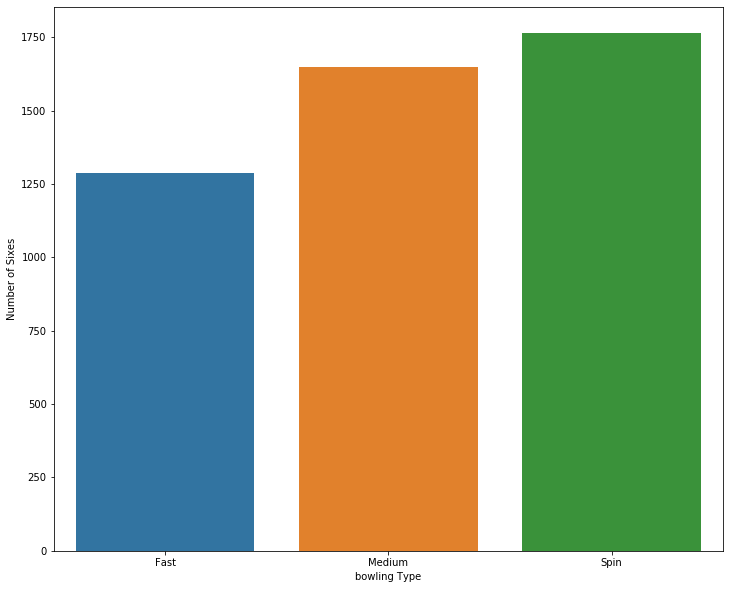

In [56]:
batsman_6s = IPL[(IPL.batsman_runs == 6) & (IPL.inning == 1)]
batsman6 = batsman_6s.groupby(['bowling Type'])['total_runs'].count()
batsman6s = batsman6.to_frame().reset_index()
batsman6s.rename(columns = {'total_runs' : 'Number of Sixes'}, inplace = True)
batsman6s
plt.figure(figsize = (12,10))
sns.barplot(x = batsman6s['bowling Type'], y = batsman6s['Number of Sixes'])

In the first innings of the match most of the sixes are conceded by the spin bowlers and the fast bowlers concede far less sixers compared to the spinners in the first innings.

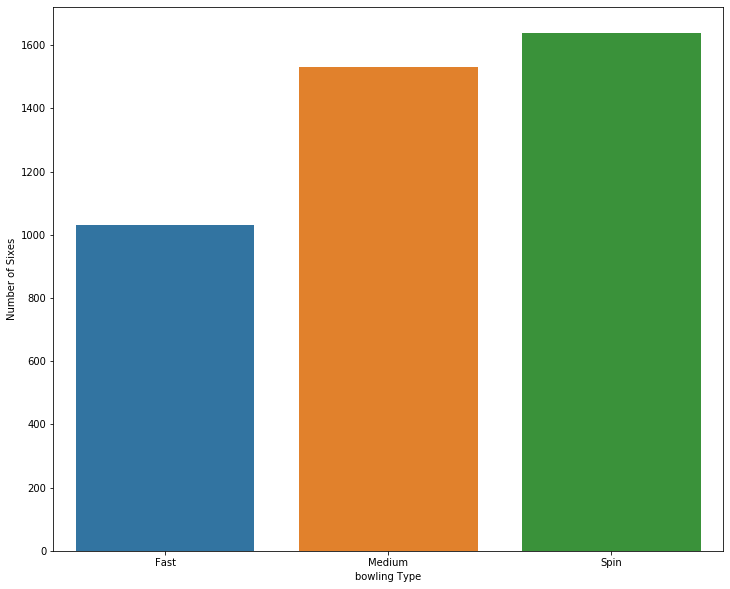

In [57]:
batsman_6_2 = IPL[(IPL.batsman_runs == 6) & (IPL.inning == 2)]
batsman6_s = batsman_6_2.groupby(['bowling Type'])['total_runs'].count()
batsman6_6 = batsman6_s.to_frame().reset_index()
batsman6_6.rename(columns = {'total_runs' : 'Number of Sixes'}, inplace = True)
batsman6_6
plt.figure(figsize = (12,10))
sns.barplot(x = batsman6_6['bowling Type'], y = batsman6_6['Number of Sixes'])

In both the innings the spiners concede most number of sixes

The fast bowers conceding the number od sixes has been reduced in the second innings but the medium pacers are closely related.


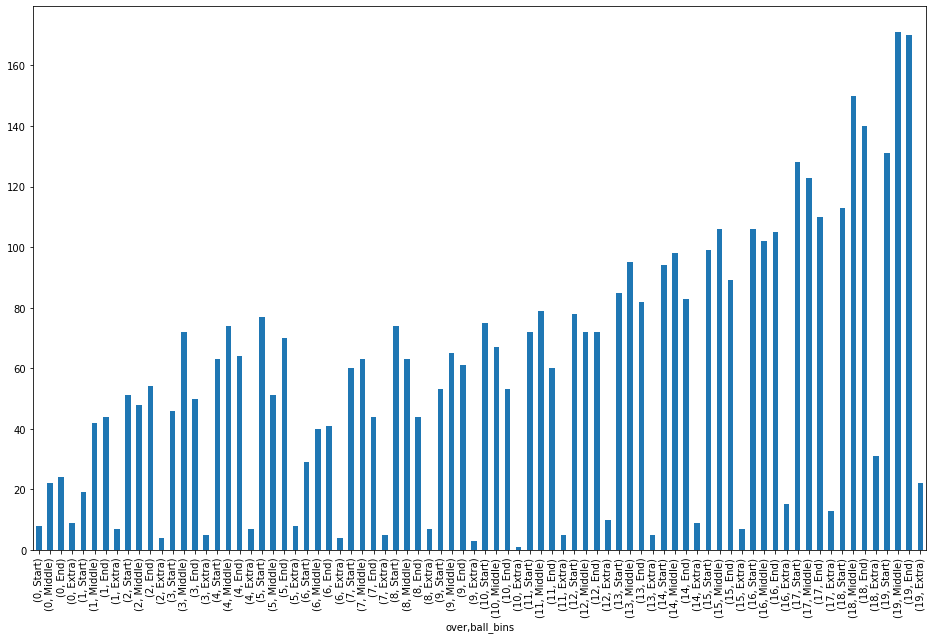

In [58]:
batsman66 = IPL[(IPL.batsman_runs == 6) & (IPL.inning == 1) ]
batsman6_s = batsman66.groupby(['over'])['ball_bins'].value_counts().sort_index().plot.bar(figsize = (16,10))

The highest number of sixes are scored in the middle of the 19th over and end of the 19th over in the first innings.

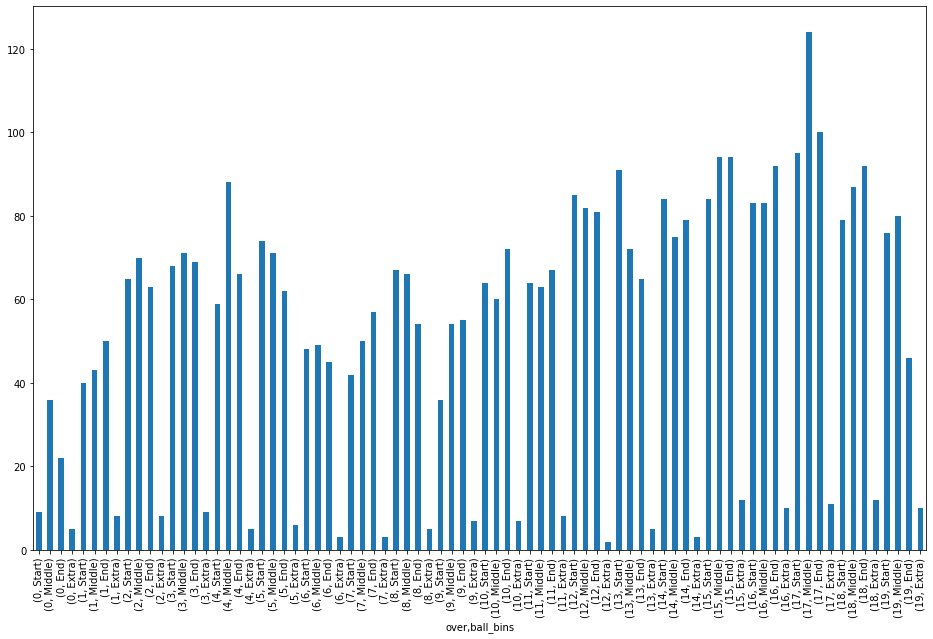

In [59]:
batsman6_6 = IPL[(IPL.batsman_runs == 6) & (IPL.inning == 2) ]
batsman6_2 = batsman6_6.groupby(['over'])['ball_bins'].value_counts().sort_index().plot.bar(figsize = (16,10))

The most number of sixes are scored in the middle of the 17th over in the second innings but there are less number of sixes scored in the second innings compared with the first innings. 

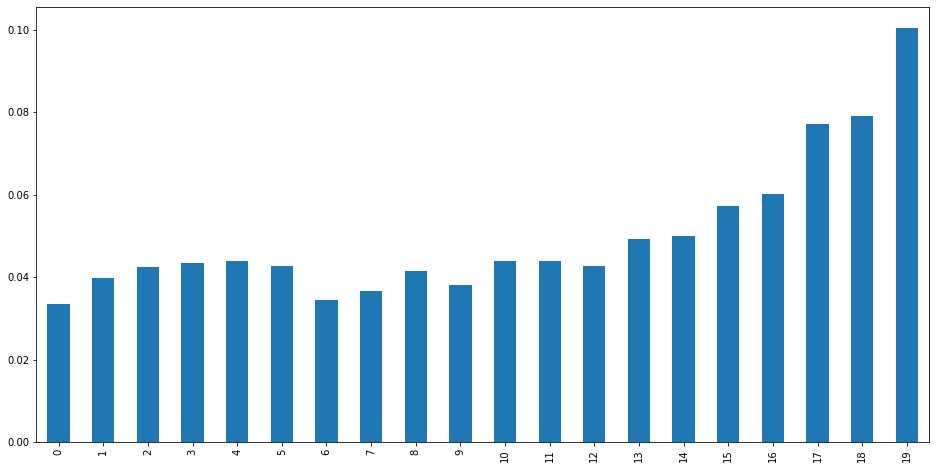

In [60]:
IPL[IPL.is_wicket == 1].over.value_counts(normalize=True).sort_index().plot.bar(figsize=(16, 8))

Most number of wickets are falling towards the end of the innings in  a match

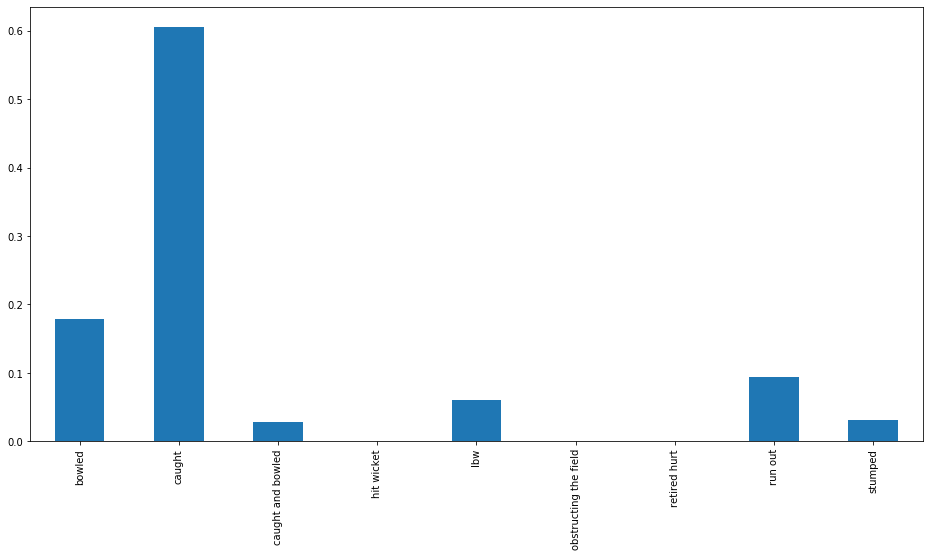

In [61]:
IPL[IPL.is_wicket == 1].dismissal_kind.value_counts(normalize=True).sort_index().plot.bar(figsize=(16, 8))

Most of the dismissals are in the form of catches.

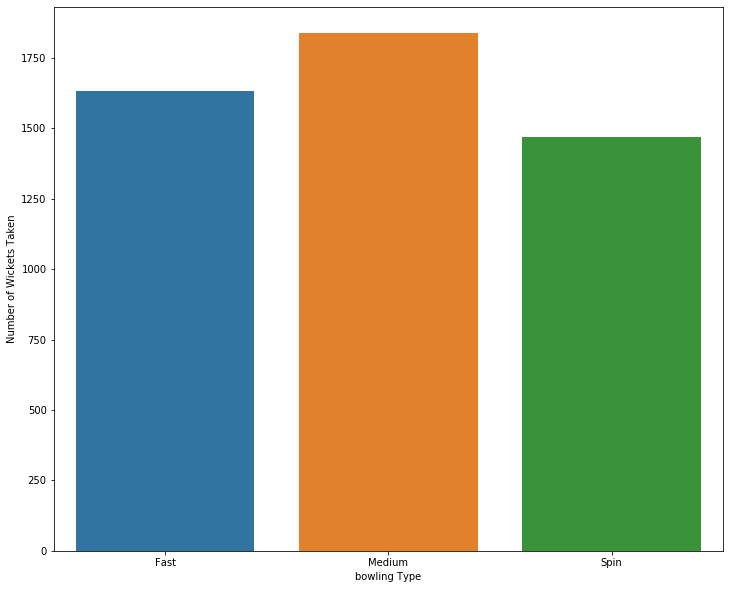

In [62]:
wickets_1 = IPL[(IPL.is_wicket == 1) & (IPL.inning == 1)]
wicket_s = wickets_1.groupby(['bowling Type'])['is_wicket'].count()
wicket1_s = wicket_s.to_frame().reset_index()
wicket1_s.rename(columns = {'is_wicket' : 'Number of Wickets Taken'}, inplace = True)
wicket1_s
plt.figure(figsize = (12,10))
sns.barplot(x = wicket1_s['bowling Type'], y = wicket1_s['Number of Wickets Taken'])

All bowling types are closely related and taking almost same number of wickets in first innings with medium pacers taking most number of wickets in the first innings.

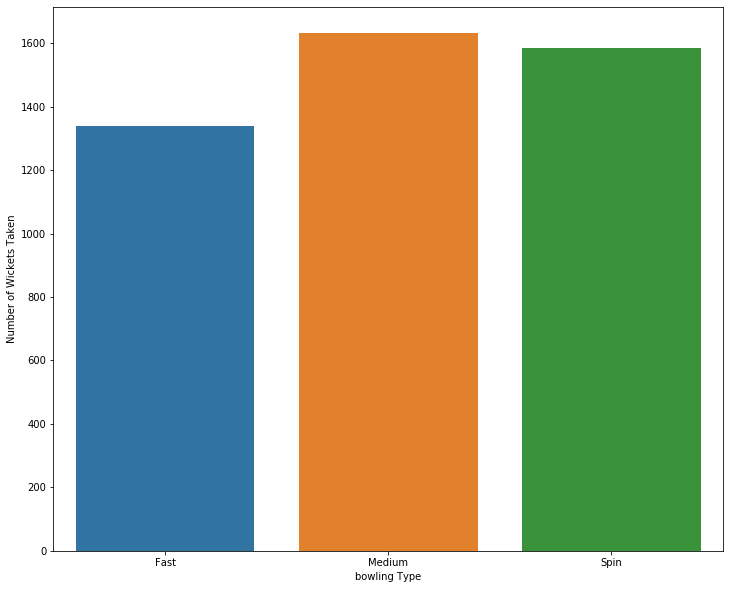

In [63]:
wickets_2 = IPL[(IPL.is_wicket == 1) & (IPL.inning == 2)]
wicket_2_s = wickets_2.groupby(['bowling Type'])['is_wicket'].count()
wicket2_s = wicket_2_s.to_frame().reset_index()
wicket2_s.rename(columns = {'is_wicket' : 'Number of Wickets Taken'}, inplace = True)
wicket2_s
plt.figure(figsize = (12,10))
sns.barplot(x = wicket2_s['bowling Type'], y = wicket2_s['Number of Wickets Taken'])

The total number of wickets falling in the second innings are slightly less compared to the first innings might be because of the dew factor.

The fast bowlers taking wickets in the second innings is less while the spinners and medium pacers are taking same amount of wickets.

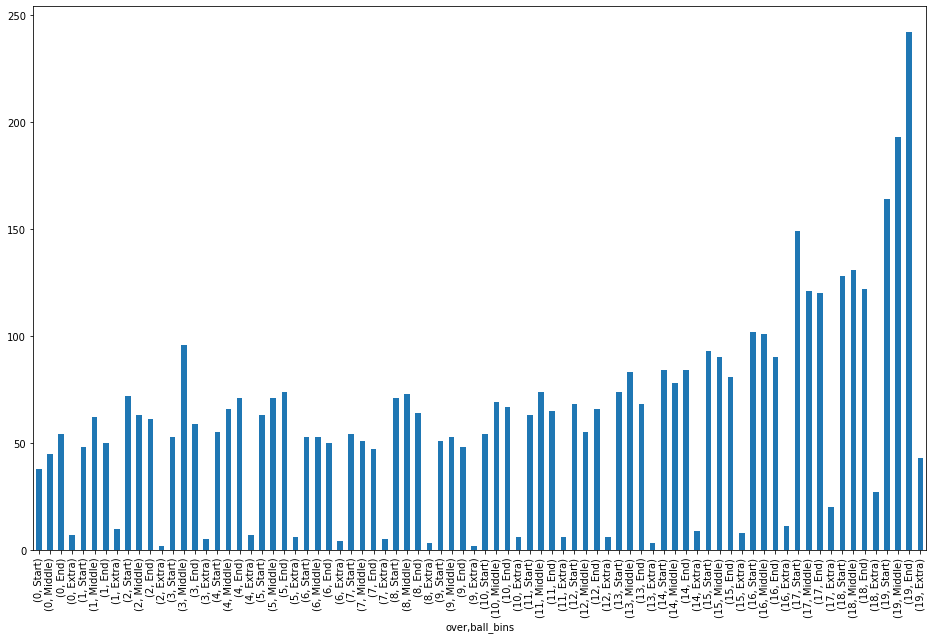

In [64]:
is_wicket_1 = IPL[(IPL.is_wicket == 1) & (IPL.inning == 1) ]
is_wicket1 = is_wicket_1.groupby(['over'])['ball_bins'].value_counts().sort_index().plot.bar(figsize = (16,10))

In the first innings highest wickets in the powerplay are falling in the 3rd over middle.

Most number of wickets in the ininngs are falling towards the end of the innings, there is a high chance of getting a wicket in the 19th over middle and in the end.


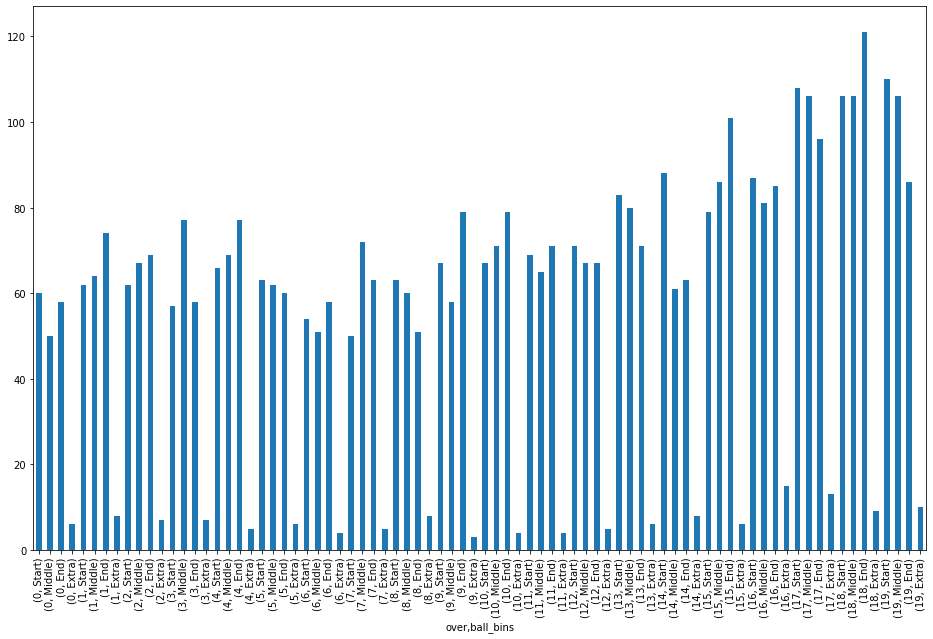

In [65]:
is_wicket_2 = IPL[(IPL.is_wicket == 1) & (IPL.inning == 2) ]
is_wicket2 = is_wicket_2.groupby(['over'])['ball_bins'].value_counts().sort_index().plot.bar(figsize = (16,10))

Though wickets are fallings constantly in the second innings the number of wickets falling towards the end of the innings is comparitively less in the second innings.

In the second innings there are high chances of falling wickets in the 17th and 19th over.

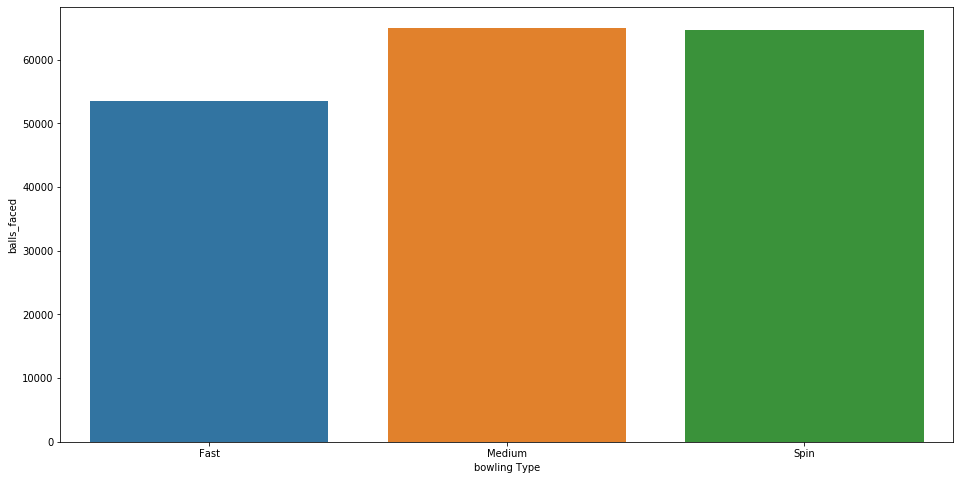

In [66]:
balls = IPL[(IPL['extra_runs'] == 0) ] 
batsman_balls_faced = balls.groupby(['bowling Type'])['ball'].count()
batsman_balls_faced
df_batsman_balls_faced = batsman_balls_faced.to_frame().reset_index()
df_batsman_balls_faced.rename(columns = {'ball' : 'balls_faced'}, inplace = True)
plt.figure(figsize = (16,8))
sns.barplot(x =  df_batsman_balls_faced['bowling Type']  , y = df_batsman_balls_faced['balls_faced']  )

The batsman are facing slighty less number of fast bowlers over the 13 IPL seasons compared with medium pacers and spinners.

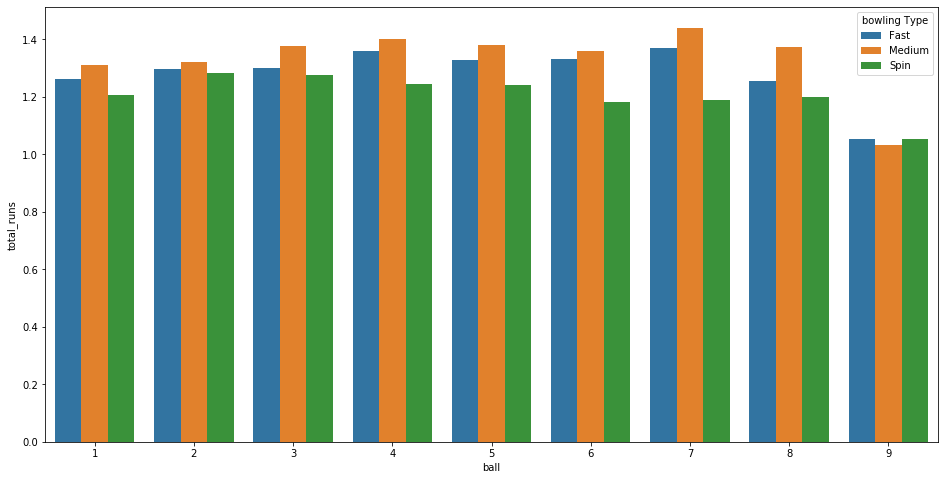

In [67]:
runs = IPL[(IPL['extra_runs'] == 0) ] 
batsman_runs_scored = runs.groupby(['bowling Type','ball'])['total_runs'].mean()
batsman_runs_scored
batsman_runs_scored_df = batsman_runs_scored.to_frame().reset_index()
batsman_runs_scored_df
plt.figure(figsize =(16,8))
sns.barplot(x = batsman_runs_scored_df['ball'],y = batsman_runs_scored_df['total_runs'], hue = batsman_runs_scored_df['bowling Type']  )

The graph gives us information about the average number of runs scored by a batsman per delivery according to their bowling type.

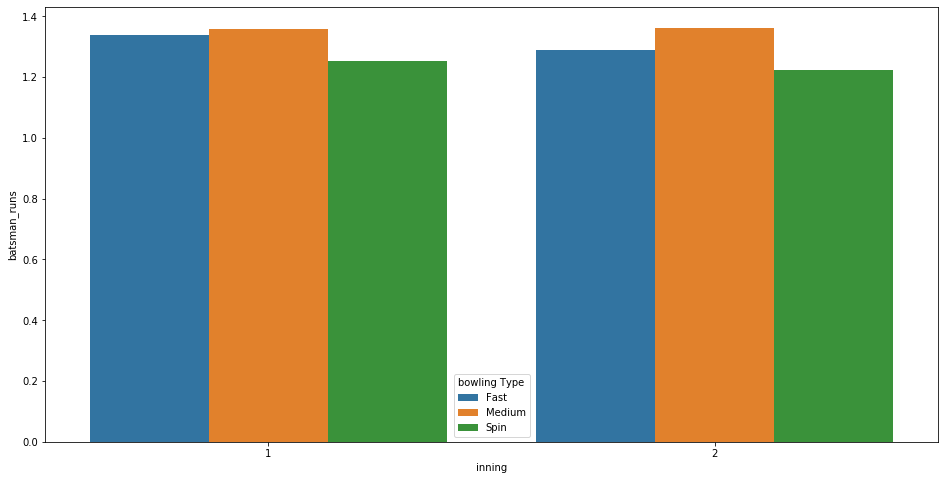

In [68]:
runs = IPL[(IPL['extra_runs'] == 0) ] 
batsman_runs_scored = runs.groupby(['bowling Type','inning'])['batsman_runs'].mean()
batsman_runs_scored
batsman_runs_scored_df = batsman_runs_scored.to_frame().reset_index()
batsman_runs_scored_df
plt.figure(figsize =(16,8))
sns.barplot(x = batsman_runs_scored_df['inning'],y = batsman_runs_scored_df['batsman_runs'], hue = batsman_runs_scored_df['bowling Type'] )


Batsman tend to score more runs in the first innings of the match compared to the second innings across all categories.

In [69]:
uids = ['id', 'inning', 'over']
batsman_performance = IPL.sort_values(by=uids).drop_duplicates(uids, keep='first')
batsman_performance.rename(columns = {'bowling Type':'bowler_type'},inplace = True)
batsman_performance.head(10)


,id,season,date,inning,over,ball,batsman,non_striker,bowler,batsman_runs,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,bowling Hand,bowler_type,ball1,ball_bins
79,335982,2008,18/04/2008,1,0,1,SC Ganguly,BB McCullum,P Kumar,0,...,Not-Out,None,None,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Medium,1 - 2,Start
86,335982,2008,18/04/2008,1,1,1,BB McCullum,SC Ganguly,Z Khan,0,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2,Start
92,335982,2008,18/04/2008,1,2,1,SC Ganguly,BB McCullum,P Kumar,0,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Medium,1 - 2,Start
98,335982,2008,18/04/2008,1,3,1,BB McCullum,SC Ganguly,AA Noffke,0,...,Not-Out,None,None,wides,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,1 - 2,Start
105,335982,2008,18/04/2008,1,4,1,SC Ganguly,BB McCullum,P Kumar,4,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Medium,1 - 2,Start
111,335982,2008,18/04/2008,1,5,1,BB McCullum,SC Ganguly,Z Khan,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2,Start
0,335982,2008,18/04/2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6,End
2,335982,2008,18/04/2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2,Start
8,335982,2008,18/04/2008,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,1 - 2,Start
14,335982,2008,18/04/2008,1,9,1,RT Ponting,BB McCullum,SB Joshi,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Spin,1 - 2,Start


In [70]:
batsman_performance['bowler_type_previous'] = batsman_performance.bowler_type.shift(1)
batsman_performance[['id', 'inning', 'over', 'bowler_type', 'bowler_type_previous']].head(10)

,id,inning,over,bowler_type,bowler_type_previous
79,335982,1,0,Medium,NaN
86,335982,1,1,Fast,Medium
92,335982,1,2,Medium,Fast
98,335982,1,3,Fast,Medium
105,335982,1,4,Medium,Fast
111,335982,1,5,Fast,Medium
0,335982,1,6,Fast,Fast
2,335982,1,7,Fast,Fast
8,335982,1,8,Fast,Fast
14,335982,1,9,Spin,Fast


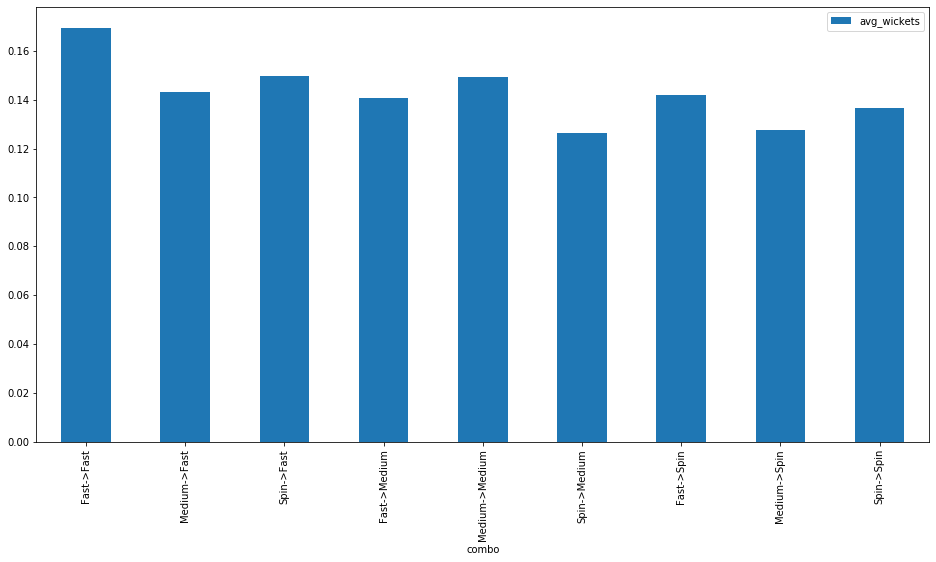

In [71]:
counts = batsman_performance.groupby(['bowler_type', 'bowler_type_previous']).is_wicket.mean()
counts.name = 'avg_wickets'
counts = counts.reset_index()

counts['combo'] = counts.bowler_type_previous + '->' + counts.bowler_type
counts.drop(columns=['bowler_type_previous', 'bowler_type'], inplace=True)

counts.plot.bar(x='combo', y='avg_wickets', figsize=(16, 8))

In [72]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier


# Generating Training Data

In [73]:
ipl = IPL.copy(deep = True)
ipl.rename(columns = {'bowling Type': 'bowler_type','bowling Hand':'bowler_hand'}, inplace = True)
ipl

,id,season,date,inning,over,ball,batsman,non_striker,bowler,batsman_runs,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,bowler_hand,bowler_type,ball1,ball_bins
0,335982,2008,18/04/2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6,End
1,335982,2008,18/04/2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6,End
2,335982,2008,18/04/2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2,Start
3,335982,2008,18/04/2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2,Start
4,335982,2008,18/04/2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,...,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,3 - 4,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2020,10/11/2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,...,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians,Right Handed,Fast,5 - 6,End
193464,1237181,2020,10/11/2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,...,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians,Right Handed,Fast,5 - 6,End
193465,1237181,2020,10/11/2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,...,Not-Out,None,None,wides,Delhi Capitals,Mumbai Indians,Left Handed,Spin,1 - 2,Start
193466,1237181,2020,10/11/2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,...,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians,Left Handed,Spin,1 - 2,Start


In [74]:
to_drop = ['season','date','batting_team','bowling_team','ball1','ball_bins']
ipl.drop(to_drop, axis = 1, inplace = True )


In [75]:
ipl.rename(columns = {'id':'match_id'}, inplace = True)

In [171]:
bowler_stats = None
for (match_id,bowler,bowler_type,inning,over), bowler_features in ipl.groupby(['match_id','bowler','bowler_type','inning','over']):
        
    row = {
        'match_id':match_id,
        'bowler': bowler,
        'bowler_type':bowler_type,
        'inning':inning,
        'over':over,
        'overs_bowled': (bowler_features.ball.count())/6,
        'economy_rate': (bowler_features.batsman_runs.sum())/((bowler_features.ball.count())/6),
        'wickets_taken': bowler_features.is_wicket.sum(),
        'extras_conceded_per_over':(bowler_features.extra_runs.sum())/((bowler_features.ball.count())/6),
        
    }
    
    if bowler_stats is None:
        bowler_stats = pd.DataFrame(row, index=[0]) 
    else:
        bowler_stats = bowler_stats.append(row, ignore_index=True)

In [172]:
bowler_stats

,match_id,bowler,bowler_type,inning,over,overs_bowled,economy_rate,wickets_taken,extras_conceded_per_over
0,335982,AA Noffke,Fast,1,3,1.166667,14.571429,0,5.142857
1,335982,AA Noffke,Fast,1,6,1.000000,7.000000,0,0.000000
2,335982,AA Noffke,Fast,1,15,1.000000,4.000000,0,0.000000
3,335982,AA Noffke,Fast,1,17,1.000000,7.000000,1,0.000000
4,335982,AB Agarkar,Fast,2,4,1.000000,8.000000,1,0.000000
...,...,...,...,...,...,...,...,...,...
31385,1237181,R Ashwin,Spin,2,12,1.000000,10.000000,0,0.000000
31386,1237181,TA Boult,Fast,1,0,1.000000,5.000000,1,0.000000
31387,1237181,TA Boult,Fast,1,2,1.000000,9.000000,1,0.000000
31388,1237181,TA Boult,Fast,1,4,1.000000,10.000000,0,0.000000


In [208]:
Z = None

for (match_id,batsman,inning,over), features in ipl.groupby(['match_id','batsman','inning','over']):
    
    row = {
        
        'match_id':match_id,
        'batsman': batsman,
        'inning': inning,
        'over':over,
        'balls_faced': (features.ball.count()),
        'runs_against_bowler_type':(features.batsman_runs.sum()),
        'runrate_per_delivery':(features.total_runs.sum()/features.ball.count()),
        'propensity_to_out':(features.is_wicket.sum()/features.ball.count()),
        'propensity_four':(((features.batsman_runs == 4).sum())/features.ball.count()),
        'propensity_six':(((features.batsman_runs == 6).sum())/features.ball.count()),
        
    }
    
    if Z is None:
        Z = pd.DataFrame(row, index=[0]) 
    else:
        Z = Z.append(row, ignore_index=True)

In [234]:
Z

,match_id,batsman,inning,over,balls_faced,runs_against_bowler_type,runrate_per_delivery,propensity_to_out,propensity_four,propensity_six
0,335982,AA Noffke,2,8,4,1,0.750000,0.0,0.000000,0.0
1,335982,AA Noffke,2,9,3,6,2.000000,0.0,0.333333,0.0
2,335982,AA Noffke,2,10,4,1,0.250000,0.0,0.000000,0.0
3,335982,AA Noffke,2,11,1,1,1.000000,1.0,0.000000,0.0
4,335982,B Akhil,2,8,2,0,0.000000,0.5,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
66234,1237181,SS Iyer,1,15,2,2,1.000000,0.0,0.000000,0.0
66235,1237181,SS Iyer,1,16,6,11,1.833333,0.0,0.333333,0.0
66236,1237181,SS Iyer,1,17,1,1,1.000000,0.0,0.000000,0.0
66237,1237181,SS Iyer,1,18,2,1,1.000000,0.0,0.000000,0.0


In [236]:
result = pd.merge(Z, bowler_stats, how="left", on=["match_id", "inning","over"])

In [237]:
result

,match_id,batsman,inning,over,balls_faced,runs_against_bowler_type,runrate_per_delivery,propensity_to_out,propensity_four,propensity_six,bowler,bowler_type,overs_bowled,economy_rate,wickets_taken,extras_conceded_per_over
0,335982,AA Noffke,2,8,4,1,0.750000,0.0,0.000000,0.0,AB Agarkar,Fast,1.333333,2.250000,2,1.500000
1,335982,AA Noffke,2,9,3,6,2.000000,0.0,0.333333,0.0,SC Ganguly,Medium,1.166667,5.142857,0,1.714286
2,335982,AA Noffke,2,10,4,1,0.250000,0.0,0.000000,0.0,AB Agarkar,Fast,1.000000,5.000000,0,0.000000
3,335982,AA Noffke,2,11,1,1,1.000000,1.0,0.000000,0.0,SC Ganguly,Medium,1.000000,3.000000,1,0.000000
4,335982,B Akhil,2,8,2,0,0.000000,0.5,0.000000,0.0,AB Agarkar,Fast,1.333333,2.250000,2,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66294,1237181,SS Iyer,1,15,2,2,1.000000,0.0,0.000000,0.0,J Yadav,Spin,1.000000,7.000000,0,0.000000
66295,1237181,SS Iyer,1,16,6,11,1.833333,0.0,0.333333,0.0,JJ Bumrah,Fast,1.000000,11.000000,0,0.000000
66296,1237181,SS Iyer,1,17,1,1,1.000000,0.0,0.000000,0.0,TA Boult,Fast,1.000000,6.000000,1,0.000000
66297,1237181,SS Iyer,1,18,2,1,1.000000,0.0,0.000000,0.0,JJ Bumrah,Fast,1.000000,5.000000,0,1.000000


In [241]:
 result.rename(columns={'wickets_taken':'wickets_taken_in_over',
                      'runs_against_bowler_type':'runs_scored_in_over'},inplace = True)

In [242]:
result

,match_id,batsman,inning,over,balls_faced,runs_scored_in_over,runrate_per_delivery,propensity_to_out,propensity_four,propensity_six,bowler,bowler_type,overs_bowled,economy_rate,wickets_taken_in_over,extras_conceded_per_over
0,335982,AA Noffke,2,8,4,1,0.750000,0.0,0.000000,0.0,AB Agarkar,Fast,1.333333,2.250000,2,1.500000
1,335982,AA Noffke,2,9,3,6,2.000000,0.0,0.333333,0.0,SC Ganguly,Medium,1.166667,5.142857,0,1.714286
2,335982,AA Noffke,2,10,4,1,0.250000,0.0,0.000000,0.0,AB Agarkar,Fast,1.000000,5.000000,0,0.000000
3,335982,AA Noffke,2,11,1,1,1.000000,1.0,0.000000,0.0,SC Ganguly,Medium,1.000000,3.000000,1,0.000000
4,335982,B Akhil,2,8,2,0,0.000000,0.5,0.000000,0.0,AB Agarkar,Fast,1.333333,2.250000,2,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66294,1237181,SS Iyer,1,15,2,2,1.000000,0.0,0.000000,0.0,J Yadav,Spin,1.000000,7.000000,0,0.000000
66295,1237181,SS Iyer,1,16,6,11,1.833333,0.0,0.333333,0.0,JJ Bumrah,Fast,1.000000,11.000000,0,0.000000
66296,1237181,SS Iyer,1,17,1,1,1.000000,0.0,0.000000,0.0,TA Boult,Fast,1.000000,6.000000,1,0.000000
66297,1237181,SS Iyer,1,18,2,1,1.000000,0.0,0.000000,0.0,JJ Bumrah,Fast,1.000000,5.000000,0,1.000000


In [243]:
result['bowler_type_previous'] = result.bowler_type.shift(1)


In [244]:
result

,match_id,batsman,inning,over,balls_faced,runs_scored_in_over,runrate_per_delivery,propensity_to_out,propensity_four,propensity_six,bowler,bowler_type,overs_bowled,economy_rate,wickets_taken_in_over,extras_conceded_per_over,bowler_type_previous
0,335982,AA Noffke,2,8,4,1,0.750000,0.0,0.000000,0.0,AB Agarkar,Fast,1.333333,2.250000,2,1.500000,NaN
1,335982,AA Noffke,2,9,3,6,2.000000,0.0,0.333333,0.0,SC Ganguly,Medium,1.166667,5.142857,0,1.714286,Fast
2,335982,AA Noffke,2,10,4,1,0.250000,0.0,0.000000,0.0,AB Agarkar,Fast,1.000000,5.000000,0,0.000000,Medium
3,335982,AA Noffke,2,11,1,1,1.000000,1.0,0.000000,0.0,SC Ganguly,Medium,1.000000,3.000000,1,0.000000,Fast
4,335982,B Akhil,2,8,2,0,0.000000,0.5,0.000000,0.0,AB Agarkar,Fast,1.333333,2.250000,2,1.500000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66294,1237181,SS Iyer,1,15,2,2,1.000000,0.0,0.000000,0.0,J Yadav,Spin,1.000000,7.000000,0,0.000000,Fast
66295,1237181,SS Iyer,1,16,6,11,1.833333,0.0,0.333333,0.0,JJ Bumrah,Fast,1.000000,11.000000,0,0.000000,Spin
66296,1237181,SS Iyer,1,17,1,1,1.000000,0.0,0.000000,0.0,TA Boult,Fast,1.000000,6.000000,1,0.000000,Fast
66297,1237181,SS Iyer,1,18,2,1,1.000000,0.0,0.000000,0.0,JJ Bumrah,Fast,1.000000,5.000000,0,1.000000,Fast


In [311]:

final_result = result.copy()

In [312]:
final_result.replace({'Fast': 0,
               'Medium':1,
               'Spin':2},inplace = True)


In [313]:
data = final_result.set_index(['match_id','batsman','bowler'])

In [314]:
data

inning  over  balls_faced  \
match_id batsman   bowler                                       
335982   AA Noffke AB Agarkar            2     8            4   
                   SC Ganguly            2     9            3   
                   AB Agarkar            2    10            4   
                   SC Ganguly            2    11            1   
         B Akhil   AB Agarkar            2     8            2   
...                                    ...   ...          ...   
1237181  SS Iyer   J Yadav               1    15            2   
                   JJ Bumrah             1    16            6   
                   TA Boult              1    17            1   
                   JJ Bumrah             1    18            2   
                   NM Coulter-Nile       1    19            5   

                                    runs_scored_in_over  runrate_per_delivery  \
match_id batsman   bowler                                                       
335982   AA Noffke AB Agarkar                         1              0.750000   
                   SC Ganguly                         6              2.000000   
                   AB Agarkar                         1              0.250000   
                   SC Ganguly                         1              1.000000   
         B Akhil   AB Agarkar                         0              0.000000   
...                                                 ...                   ...   
1237181  SS Iyer   J Yadav                            2              1.000000   
                   JJ Bumrah                         11              1.833333   
                   TA Boult                           1              1.000000   
                   JJ Bumrah                          1              1.000000   
                   NM Coulter-Nile                    8              1.600000   

                                    propensity_to_out  propensity_four  \
match_id batsman   bowler                                                
335982   AA Noffke AB Agarkar                     0.0         0.000000   
                   SC Ganguly                     0.0         0.333333   
                   AB Agarkar                     0.0         0.000000   
                   SC Ganguly                     1.0         0.000000   
         B Akhil   AB Agarkar                     0.5         0.000000   
...                                               ...              ...   
1237181  SS Iyer   J Yadav                        0.0         0.000000   
                   JJ Bumrah                      0.0         0.333333   
                   TA Boult                       0.0         0.000000   
                   JJ Bumrah                      0.0         0.000000   
                   NM Coulter-Nile                0.2         0.000000   

                                    propensity_six  bowler_type  overs_bowled  \
match_id batsman   bowler                                                       
335982   AA Noffke AB Agarkar                  0.0            0      1.333333   
                   SC Ganguly                  0.0            1      1.166667   
                   AB Agarkar                  0.0            0      1.000000   
                   SC Ganguly                  0.0            1      1.000000   
         B Akhil   AB Agarkar                  0.0            0      1.333333   
...                                            ...          ...           ...   
1237181  SS Iyer   J Yadav                     0.0            2      1.000000   
                   JJ Bumrah                   0.0            0      1.000000   
                   TA Boult                    0.0            0      1.000000   
                   JJ Bumrah                   0.0            0      1.000000   
                   NM Coulter-Nile             0.2            0      1.000000   

                                    economy_rate  wickets_taken_in_over  \
match_id batsman   bowler                   

In [ ]:
class XGBRegressor:
    
    def predict(self, data):
        ## Predict run rate ##
        results = []
        for runs_scored_in_over in data:
            results.append(results)
        results =  pd.Series(results)
        data['predicted_run_rate'] = results
        return data

In [ ]:
model = XGBRegressor()
results = model.predict(data)
results

In [355]:
import xgboost

X = data.drop('over',axis = 1)
y = data['over']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



In [356]:
model = xgboost.XGBRegressor()


In [357]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [358]:
prediction = pd.Series(model.predict(X_test)) 

In [359]:
prediction

0        8.637227
1        8.335073
2        8.087324
3        4.867069
4        8.804937
           ...   
13255    5.851737
13256    4.888177
13257    8.322343
13258    8.655076
13259    9.912454
Length: 13260, dtype: float32

In [360]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 4.027331336610494
MSE: 24.112364830421622
RMSE: 4.9104342812445445


In [322]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.11983571379957948
MSE: 0.07474066589717109
RMSE: 0.273387391620702


In [277]:
import xgboost

In [282]:
X = data.drop('bowler_type',axis = 1)
y = data['bowler_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [283]:
model = XGBClassifier(n_estimators = 100)

In [285]:
model.fit(X_train,y_train)

C:\Users\PARVA\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:52:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
pred1 = model.predict(X_test)

In [290]:
print("Accuracy score of {} is {:.2f}%\n".format(model, accuracy_score(y_test, pred1)*100))
print(classification_report(y_test,pred1, labels=[0,1,2]))

Accuracy score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 50.77%

              precision    recall  f1-score   support

           0       0.48      0.38      0.42      3884
           1       0.46      0.41      0.43      4646
           2       0.56      0.71      0.62      4730

    accuracy                           0.51     13260
   macro avg       0.50      0.50      0.49     13260
weighted avg      